In [245]:
#data base connection
import csv
import pandas
from sshtunnel import SSHTunnelForwarder
import pymysql
server =    SSHTunnelForwarder(
         ('juhu.soic.indiana.edu'),
         ssh_password="",
         ssh_username="qismail",
         remote_bind_address=('127.0.0.1', 3306))
server.start()
cnx = pymysql.connect(host='127.0.0.1',
                           port=server.local_bind_port,
                           user='mturk',
                           passwd='m+turk=my-sql',
                           db='mturk')
cnx.set_charset('utf8')       

In [246]:
#prepare survey2 table:
#prepare survey2 file
#write a code to split the column from table app2
#insert the splitted value to survey2 , with the names of the apps as “N/A”
#add the names of the apps to the table too
#allEnabledAppName, allDisabledAppName,PERMISSIONenabled,PERMISSIONdisabled
data=[]
query1 = ("select msg,allEnabledAppName, allDisabledAppName,PERMISSIONenabled,PERMISSIONdisabled from apps2")
cursor1=cnx.cursor()
cursor1.execute(query1)
for row in cursor1:
    
    #print (row[0])
    #print(row[1])#allEnabled
    #print(row[2])#allDisabled
    #print(row[3])#enabled
    #print(row[4])#disabled
    allEnabled=row[1]
    allDisabled=row[2]
    enabledApps=['','','','','']
    disabledApps=['','','','','']
    
    #split the list of apps for enabled and disabled, and if fewer than 5 apps, fill the rest with empty strings
    enabledApps = row[3].split(",") #split string into a list
    disabledApps = row[4].split(",") #split string into a list
    
    if len(enabledApps) <5:
        j=len(enabledApps)
        while j < 5:
            enabledApps.append('')
            j=j+1  

    if len(disabledApps) <5:
        j=len(disabledApps)
        while j < 5:
            disabledApps.append('')
            j=j+1  
    
    print (len(disabledApps))
    print (len(enabledApps))
    #print ("\n")
    msg = row[0].split("#") #split string into a list


    #escape the quotes
    i=0
    while i < len(msg):
        msg[i]=msg[i].replace("'", "\\\'")
        msg[i]=msg[i].replace("\\\\'", "\\\'")
        i=i+1 
   
    #deal with the situation when there are only msg length =58 (before adding the follow up question for the story)
    if len(msg)<65:
        j=len(msg)
        while j < 65 :
            msg.append('')
            j=j+1  
        #move the duration and times to the last 3 columns and fill the previous ones with empty strings
        msg[62]=msg[55]#start
        msg[63]=msg[56]#end
        msg[64]=msg[57]#duration
        msg[55]=''
        msg[56]=''
        msg[57]=''
        msg[58]=''
        msg[59]=''
        msg[60]=''
        msg[61]=''

    len(msg)
    print (len(msg))
    print(msg)
    
    data.append(msg)
    cursor3 = cnx.cursor()
    insertQ = "insert into survey2(randomint,permission,TurkerID,attention1,attention2,attention3,gender,education,race,androidDuration,priorAndroid,canChange,howChange,everChanged,seenMessage,allEnabledAppName,enabledAllaware,enabledAllwhy,allDisabledAppName,disabledAll,PERMISSIONenabled1,PERMISSIONenabled2,PERMISSIONenabled3,PERMISSIONenabled4,PERMISSIONenabled5,comfortableMic,changesettingsMic1,changesettingsissueMic1,problemMic1,changesettingsMic2,changesettingsissueMic2,problemMic2,changesettingsMic3,changesettingsissueMic3,problemMic3,changesettingsMic4,changesettingsissueMic4,problemMic4,changesettingsMic5,changesettingsissueMic5,problemMic5,enabledwhyMic1,enabledwhyMic2,enabledwhyMic3,enabledwhyMic4,enabledwhyMic5,PERMISSIONdisabled1,PERMISSIONdisabled2,PERMISSIONdisabled3,PERMISSIONdisabled4,PERMISSIONdisabled5,disabledawareMic1,disabledwhyMic1,disabledawareMic2,disabledwhyMic2,disabledawareMic3,disabledwhyMic3,disabledawareMic4,disabledwhyMic4,disabledawareMic5,disabledwhyMic5,danger,story,storyPermission,storyApp,storyProblem,storySolve,storyTempEnable,storyEnableComfort,storyBehaviour,storyBehaviourHow,storyReinstall,storyOtherApp,storyUninstallComfort,startTime,endTime,duration) VALUES(%s,%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    number_of_rows = cursor3.execute(insertQ,(msg[0],msg[1],msg[2],msg[3],msg[4],msg[5],msg[6],msg[7],msg[8],msg[9],msg[10],msg[11],msg[12],msg[13],msg[14],allEnabled,msg[15],msg[16],allDisabled,msg[17],enabledApps[0],enabledApps[1],enabledApps[2],enabledApps[3],enabledApps[4],msg[18],msg[19],msg[20], msg[21],msg[22],msg[23],msg[24],msg[25],msg[26],msg[27],msg[28],msg[29],msg[30], msg[31],msg[32],msg[33],msg[34],msg[35],msg[36],msg[37],msg[38],disabledApps[0],disabledApps[1],disabledApps[2],disabledApps[3],disabledApps[4],msg[39],msg[40], msg[41],msg[42],msg[43],msg[44],msg[45],msg[46],msg[47],msg[48],msg[49],msg[50], msg[51],msg[52],msg[53],msg[54],msg[55],msg[56],msg[57],msg[58],msg[59],msg[60], msg[61],msg[62],msg[63],msg[64]))  
    cnx.commit()
    #msg
#cnx.close()

5
5
65
['72865', 'LOCATION', 'A4IH4CO046EV3', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', '7-12 months', 'No', 'Yes', 'I would limit everything', 'No', 'Yes', 'Yes', "I want to use a specific feature that requires this permission, I think the app won\\'t work otherwise, I trust the app developer", "I think the app shouldn\\'t need this permission, I can always grant it afterwards if I change my mind", '', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', "I didn\\'t know I did that", "I didn\\'t know I did that", "I didn\\'t know I did that", 'No', 'NA', 'No', 'NA', 'No', 'NA', 'Yes', 'I can always grant it afterwards if I change my mind', 'No', 'NA', '2,2,4,4,4,4,1,1,4', 'No', 'NA', 'NA', 'NA', 'NA', '', '', '', '', '', '', '', '21-11-2017-05-43-45', '21-11-2017-05-48-04', '4.3166666666667']
5
5
6

5
5
65
['37438', 'CAMERA', 'A1L3937MY09J3I', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', 'more than 18 months', 'Yes', 'Yes', 'apps access menu', 'Yes', 'Yes', 'Yes', 'Other: needed to in order to install', 'I donâ€™t use the app', '', 'Yes', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Other: in order to upload pictures directly', 'NA', 'NA', 'NA', 'NA', 'Yes', 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '3,4,3,3,4,3,3,3,3', 'No', 'NA', 'NA', 'NA', 'NA', '', '', '', '', '', '', '', '22-11-2017-06-38-14', '22-11-2017-06-42-22', '4.1333333333333']
5
5
65
['60665', 'CONTACTS', 'A94DL4GI8ZBUO', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', '13-18 months', 'Yes', 'Yes', 'I would go to the user app setting and change it 

5
5
65
['92776', 'LOCATION', 'A3ANNQ73J8M158', 'Android', 'Rarely', 'Agree', 'Female', 'High School', 'White', '13-18 months', 'Yes', 'Yes', 'go into settings and mess with permissions', 'Yes', 'Yes', 'Yes', 'I trust the app developer', 'I donâ€™t use the app', '5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I have nothing to hide, I trust the app developer', 'I trust the app developer', 'NA', 'NA', 'NA', 'Yes', 'I donâ€™t use the app', 'Yes', 'I expect the app will still work without this permission', 'Yes', 'I wanted the permission screen to go away', 'Yes', 'I do not use the specific feature associated with the permission', 'Yes', 'I can always grant it afterwards if I change my mind', '4,3,1,3,2,3,2,2,1', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '19-02-2018-04-41-48', '19-02-2018-04-44-36', '2.8']
5
5
65
['14068', 'MICROPHONE', 'A1W7QLLENVP2AE', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (

5
5
65
['78681', 'LOCATION', 'A37CO0N1KC1CDW', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'White', 'more than 18 months', 'Yes', 'No', 'NA', 'NA', 'Yes', 'Yes', 'I trust the app developer', "I don\\'t trust the developer enough to provide this information", '3,4', 'No', 'NA', 'NA', 'Yes', 'Yes', 'none', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Because the app is popular', 'I trust the app developer', 'NA', 'NA', 'NA', 'Yes', 'Other: ', 'Yes', "I think the app shouldn\\'t need this permission", 'Yes', 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', 'NA', 'NA', 'NA', 'NA', '2,4,3,3,4,2,2,4,4', 'No', 'NA', 'NA', 'NA', 'NA', '', '', '', '', '', '', '', '12-01-2018-03-27-16', '12-01-2018-03-29-00', '1.7333333333333']
5
5
65
['56990', 'CAMERA', 'A1USR9JCAMDGM3', 'Android', 'Rarely', 'Agree', 'Female', 'High School', 'White', 'more than 18 months', 'Yes', 'No', 'NA', 'NA', 'Yes', 'Yes', 'I have nothing

5
5
65
['57847', 'STORAGE', 'A1601UNFFAAQOI', 'Android', 'Rarely', 'Agree', 'Female', 'College graduate (B.S., B.A., or other 4 year degree)', 'Black or African American', '7-12 months', 'Yes', 'Yes', 'Access app permissions in settings', 'No', 'Yes', 'No', 'Other: App was default on device and I never reviewed its permissions', 'I think something bad might happen if I provide this permission', '5,5,5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', "I think the app won\\'t work otherwise", "I think the app won\\'t work otherwise", "I think the app won\\'t work otherwise", "I think the app won\\'t work otherwise", "I think the app won\\'t work otherwise", 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '3,4,3,4,3,3,3,2,4', 'Yes', 'Location', 'It was a photo printing app that would not function without location services so I uninstalled it (apologies, cannot remember exact name)', "Kept prompting for location services, which I d

5
5
65
['90655', 'PHONE', 'A3EAUAU8V3B5S7', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'White', '0-6 months', 'Yes', 'Yes', 'settings, apps, app permissions', 'No', 'Yes', 'NA', 'NA', 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', '5', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I trust the app developer, I wanted the permission screen to go away, I have nothing to hide', 'NA', 'NA', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '2,4,4,2,2,4,2,2,2', 'Yes', 'Camera', 'Instagram', "I couldn\\'t browse without granting access", 'Re-enabled the permission', '', '', '', '', '', '', '', '28-01-2018-08-10-14', '28-01-2018-08-13-20', '3.1']
5
5
65
['34832', 'MICROPHONE', 'A2QIZ31TMHU0GD', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'Asian', 'more than 18 months', 'Yes', 'No', 'NA', 'NA', 'Yes',

5
5
65
['22032', 'STORAGE', 'A3OV174HQJIJK8', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', '13-18 months', 'Yes', 'Yes', 'go to settings, apps, and change the permissions', 'No', 'Yes', 'No', 'I want to use a specific feature that requires this permission', "I expect the app will still work without this permission, I can always grant it afterwards if I change my mind, I think something bad might happen if I provide this permission, I think the app shouldn\\'t need this permission, I consider the permission to be very sensitive", '5,4,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'NA', 'No', 'NA', 'No', 'NA', 'Yes', "I can always grant it afterwards if I change

5
5
65
['32664', 'PHONE', 'A3SG23IVI6PS0L', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'White', '0-6 months', 'Yes', 'Yes', 'in settings go to the particular app and click on permissions', 'No', 'Yes', 'Yes', "Nothing bad will happen, I trust the app developer, I think the app won\\'t work otherwise", "I didn\\'t know I did that", '5', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'The app developer already has this information about me, I have nothing to hide, I trust the app developer', 'NA', 'NA', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '2,3,4,2,2,3,1,2,2', "I don\\'t know", 'I donâ€™t remember', "don\\'t remember", "wouldn\\'t work until I enabled all the permissions", 'Re-enabled the permission', '', '', '', '', '', '', '', '30-01-2018-02-23-54', '30-01-2018-02-30-26', '6.5333333333333']
5
5
65
['30922', 'MICROPHONE', 'A2B227N1NQYS56', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'Whi

5
5
65
['94095', 'PHONE', 'A14WLAP6TCEKO0', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'Black or African American', '7-12 months', 'Yes', 'Yes', 'go to settings and change access', 'Yes', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission, I have nothing to hide', "I don\\'t trust the developer enough to provide this information, I can always grant it afterwards if I change my mind", '5', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I wanted the permission screen to go away, I want to use a specific feature that requires this permission', 'NA', 'NA', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '1,4,3,1,4,5,3,3,1', 'No', 'NA', 'NA', 'NA', 'NA', '', '', '', '', '', '', '', '30-01-2018-04-36-13', '30-01-2018-04-39-19', '3.1']
5
5
65
['10624', 'LOCATION', 'A3586AZAAHFYBX', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A.

5
5
65
['98405', 'CAMERA', 'A3OSOGJTD4XD9U', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', '13-18 months', 'Yes', 'Yes', 'by changing the information', 'No', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission', "I didn\\'t know I did that", '3,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', "I didn\\'t know I did that", 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'Yes', "I think the app shouldn\\'t need this permission", 'No', 'NA', '4,5,4,4,4,5,4,3,5', 'Yes', 'Camera', 'Facebook', 'required permission', 'Uninstalled the app', '', '', '', '', '', '', '', '31-01-2018-01-30-28', '31-01-2018-01-34-51', '4.3833333333333']
5
5
65
['35983', 'STORAGE', 'A2LAWUYEMWODHH', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'Black or African American, White', '7-12 mo

5
5
65
['35955', 'CAMERA', 'A10299EPNHZ504', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', 'more than 18 months', 'Yes', 'Yes', 'photos', 'Yes', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission', "I don\\'t trust the developer enough to provide this information", '2', 'Yes', 'Yes', 'old version of Android', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', "I won\\'t be able to grant this permission later", 'NA', 'NA', 'NA', 'NA', 'Yes', "I don\\'t trust the developer enough to provide this information", 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '2,3,3,2,3,3,2,3,3', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '20-02-2018-11-12-31', '20-02-2018-11-16-28', '3.95']
5
5
65
['99022', 'CONTACTS', 'AVQGY7FCU80XP', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'Black or African American', '7-12 months', 'Yes', 'Yes', 'change app premissions', 'Y

5
5
65
['12966', 'STORAGE', 'A1DF95UHU5JH4Q', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'Black or African American', '0-6 months', 'Yes', 'Yes', 'allow access after going into settings', 'No', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission', 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', '5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I want to use a specific feature that requires this permission', "I don\\'t know", 'NA', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '4,4,5,5,4,4,5,4,5', "I don\\'t know", 'Camera', 'apps survey', 'none', 'Uninstalled the app', 'NA', 'NA', 'NA', 'NA', 'Yes', 'No', 'strongly agree', '20-02-2018-04-24-53', '20-02-2018-04-34-39', '9.7666666666667']
5
5
65
['52362', 'LOCATION', 'A1SIUJEL2LS8UO', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4

5
5
65
['95330', 'PHONE', 'AAEZQL4J6CQGM', 'Android', 'Rarely', 'Agree', 'Male', "Master\\'s or Professional degree (e.g. Law, Medical, Business, etc.)", 'Black or African American', '7-12 months', 'Yes', 'Yes', 'go to the app and check what you want it have access to', 'No', 'Yes', 'Yes', 'I have nothing to hide, I want to use a specific feature that requires this permission', "I didn\\'t know I did that", '5', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', "I don\\'t know", 'NA', 'NA', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '4,4,4,4,4,4,4,4,4', 'Yes', 'Location', 'dont remember', 'coukdnt use it', 'Re-enabled the permission', 'I temporarily enabled the permission for the app (for a specific time) then disabeld it later', 'agree', 'No', 'NA', 'NA', 'NA', 'NA', '20-02-2018-07-19-27', '20-02-2018-07-23-29', '4.0333333333333']
5
5
65
['23172', 'STORAGE', 'A1ZM4MGF3PDJ0M', 'Android', 'Rarely', 'Agree', 'Female', '

5
5
65
['96908', 'CONTACTS', 'A1WOCD9SAYI07V', 'Android', 'Rarely', 'Agree', 'Female', "Master\\'s or Professional degree (e.g. Law, Medical, Business, etc.)", 'White', 'more than 18 months', 'Yes', 'Yes', 'I would go to the apps permission settings and disable what I want.', 'Yes', 'Yes', 'Yes', 'I trust the app developer', 'I donâ€™t use the app', '5,5,5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'Nothing bad will happen', 'Nothing bad will happen', 'Nothing bad will happen, I trust the app developer', 'Nothing bad will happen', 'Nothing bad will happen', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '3,4,2,3,4,2,1,1,3', 'Yes', 'Storage', 'Snapchat', 'It would not save my snap to my phone unless I enabled access to storage.', 'Re-enabled the permission', 'I permanently enabled the permission for the app and never disabled it again', 'agree', 'No', 'NA', 'NA', 'NA', 'NA', '23-02-2018-02-47-57', '23-02-2018-02-53-35', '

5
5
65
['42216', 'CONTACTS', 'A1AGPPFSUSJSZN', 'Android', 'Rarely', 'Agree', 'Female', 'High School', 'White', '13-18 months', 'Yes', 'Yes', 'settings >permissions', 'Yes', 'Yes', 'NA', 'NA', 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', '4', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'NA', 'NA', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '3,4,5,3,4,3,2,5,4', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '23-02-2018-05-43-10', '23-02-2018-05-48-26', '5.2666666666667']
5
5
65
['81996', 'CAMERA', '', 'Android', 'Rarely', 'Agree', 'Female', 'College graduate (B.S., B.A., or other 4 year degree)', 'Black or African American', 'more than 18 months', 'Yes', 'Yes', 'I would remove access to my contacts and camera, microphone', 'No', 'Yes', 'NA', 'NA', 'NA', 'NA'

5
5
65
['91008', 'PHONE', 'A22EDUBB602EJD', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', '7-12 months', 'Yes', 'Yes', 'settings..\\napps.. permissions', 'Yes', 'Yes', 'No', "I didn\\'t know I did that", "I can always grant it afterwards if I change my mind, I think the app shouldn\\'t need this permission", '4', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'NA', 'NA', 'NA', 'NA', 'Yes', "I think the app shouldn\\'t need this permission", 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '4,3,3,4,4,2,2,3,3', 'Yes', 'Location', 'lyft', 'could not use at all, completely Geo dependent', 'Re-enabled the permission', 'I permanently enabled the permission for the app and never disabled it again', 'agree', 'No', 'NA', 'NA', 'NA', 'NA', '23-02-2018-07-29-29', '23-02-2018-07-39-00', '9.5166666666667']
5
5
65
['14500', 'LOCATION', 

5
5
65
['14361', 'CONTACTS', 'A39GADIK8RLMVC', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', '13-18 months', 'Yes', 'Yes', 'go to settings and apps then the app in question, modify permissions there', 'No', 'Yes', 'Yes', 'I have nothing to hide', "I think the app shouldn\\'t need this permission", '5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'Yes', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'NA', 'NA', 'Yes', "I think the app shouldn\\'t need this permission", 'Yes', "I think the app shouldn\\'t need this permission", 'Yes', "I think the app shouldn\\'t need this permission", 'Yes', 'I do not use the specific feature associated with the permission', 'NA', 'NA', '2,1,1,2,2,2,2,1,2', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 

5
5
65
['18884', 'CAMERA', 'A3MPHGI584PR1U', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'Black or African American', '0-6 months', 'Yes', 'Yes', 'I would go the settings for that app in the app manager', 'No', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission', 'I donâ€™t use the app', '4,4,4,4,4', 'No', 'NA', 'NA', 'Yes', 'No', 'NA', 'Yes', 'No', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '3,3,3,3,3,3,3,3,3', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '26-02-2018-01-03-55', '26-02-2018-01-08-37', '4.7']
5
5
65
['74101', 'CAMERA', 'A1M

5
5
65
['86777', 'LOCATION', 'ALM8YFO0272UR', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', 'more than 18 months', 'Yes', 'Yes', 'go into the app setting and change its acess', 'No', 'Yes', 'Yes', "I wanted the permission screen to go away, I think the app won\\'t work otherwise, I trust the app developer", "I don\\'t trust the developer enough to provide this information, I can always grant it afterwards if I change my mind", '5,3,4,4,2', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I trust the app developer, I want to use a specific feature that requires this permission', "I don\\'t know", 'I want to use a specific feature that requires this permission', "I don\\'t know", "I didn\\'t know I did that", 'No', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '3,3,5,2,4,4,2,3,4', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '26-02-2018-03-51-11', '26-02-2018-03-56-02', '4.85']
5
5
65
['95072', 

5
5
65
['72568', 'PHONE', 'AA8MK8AWWWL62', 'Android', 'Rarely', 'Agree', 'Female', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', '7-12 months', 'Yes', 'Yes', 'through app usage', 'Yes', 'Yes', 'Yes', 'I trust the app developer', "I think the app shouldn\\'t need this permission, I expect the app will still work without this permission, I can always grant it afterwards if I change my mind", '4,2,4,4,2', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'Other: In order to record phonecalls if needed', "I didn\\'t know I did that", 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', "I didn\\'t know I did that", 'Yes', "I think the app shouldn\\'t need this permission", 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '4,4,4,3,4,4,3,4,4', 'Yes', 'Camera', 'flashlight', 'it was supposed to be a simple flashlight app, but it requires all permissions to 

5
5
65
['41402', 'STORAGE', 'AIX6PAGON01EE', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', '7-12 months', 'No', 'Yes', 'Go into the app settings and change permissions', 'Yes', 'Yes', 'Yes', "Nothing bad will happen, I want to use a specific feature that requires this permission, I think the app won\\'t work otherwise, I trust the app developer", 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', '3,4,5,3,4', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'Yes', 'No', 'NA', 'No', 'NA', 'NA', "I wanted the permission screen to go away, I think the app won\\'t work otherwise", 'Because the app is popular', "I didn\\'t know I did that, I think the app won\\'t work otherwise", "I think the app won\\'t work otherwise, I don\\'t know", 'The app developer already has this information about me, I want to use a specific feature that requires this permission, I wanted the permission screen to go away', 'No', 'N

5
5
65
['71328', 'CAMERA', 'A2UTHR7YGLN9DC', 'Android', 'Rarely', 'Agree', 'Female', 'College graduate (B.S., B.A., or other 4 year degree)', 'Hispanic', '7-12 months', 'Yes', 'Yes', 'on my app settings', 'Yes', 'Yes', 'No', "I think the app won\\'t work otherwise", "I didn\\'t know I did that", '5,5,5,3,2', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I want to use a specific feature that requires this permission', "I wanted the permission screen to go away, I think the app won\\'t work otherwise", "I think the app won\\'t work otherwise", 'Nothing bad will happen', "I didn\\'t know I did that", 'No', 'NA', 'Yes', 'I donâ€™t use the app', 'Yes', 'I do not use the specific feature associated with the permission', 'No', 'NA', 'No', 'NA', '3,3,3,3,3,4,3,3,3', 'Yes', 'Location', 'maps uber Lyft', 'did not work properly and would repeteadly ask for permission.', 'Re-enabled the permission', 'I temporarily enabled the permission for the app (for

5
5
65
['16888', 'CAMERA', 'A17CM9QPETQYGH', 'Android', 'Rarely', 'Agree', 'Male', 'High School', 'White', '7-12 months', 'Yes', 'No', 'NA', 'NA', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission, The app developer already has this information about me, I have nothing to hide, Nothing bad will happen, I trust the app developer', "I donâ€™t use the app, I don\\'t know", '5,4,5,5,4', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', "I have nothing to hide, I didn\\'t know I did that", 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission, I have nothing to hide', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '2,2,2,2,2,2,2,2,2', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '

5
5
65
['45257', 'CONTACTS', 'AUJU22WBACIBR', 'Android', 'Rarely', 'Agree', 'Male', 'High School', 'White', '7-12 months', 'Yes', 'Yes', 'If I needed to I could root my phone and use one of many root apps to change permissions. My phone also has the option to change permisions by default but not all permissions are available.', 'No', 'Yes', 'Yes', 'I trust the app developer', 'I do not use the specific feature associated with the permission, The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', '5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', "I have nothing to hide, I trust the app developer, I want to use a specific feature that requires this permission, I think the app won\\'t work otherwise", 'Because the app is popular, I want to use a specific feature that requires this permission', 'I trust the app developer', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No

5
5
65
['57599', 'STORAGE', 'A2CTA782EBXUCT', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'Hispanic', '7-12 months', 'Yes', 'Yes', 'I would change certain permissions like access to photos and camera', 'Yes', 'Yes', 'No', "Nothing bad will happen, I think the app won\\'t work otherwise, I have nothing to hide", 'The app did not ask for that permission/I did not disable the permission/I think thatâ€™s the default setting', '4,4,3,4,4', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', "Nothing bad will happen, I think the app won\\'t work otherwise", "Nothing bad will happen, I have nothing to hide, I think the app won\\'t work otherwise", 'Nothing bad will happen', "Nothing bad will happen, I have nothing to hide, I think the app won\\'t work otherwise", "Nothing bad will happen, I think the app won\\'t work otherwise", 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '2,3,2,4,4,2,2,2,

5
5
65
['71392', 'CONTACTS', 'AB8FEGGUOZXXA', 'Android', 'Rarely', 'Agree', 'Female', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', 'more than 18 months', 'Yes', 'Yes', 'go into app settings and change the settings', 'Yes', 'Yes', 'Yes', 'I trust the app developer', 'I expect the app will still work without this permission', '3,4,4', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', "I didn\\'t know I did that", 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'NA', 'NA', 'Yes', "I think the app shouldn\\'t need this permission", 'Yes', "I think the app shouldn\\'t need this permission", 'Yes', 'I do not use the specific feature associated with the permission', 'No', 'NA', 'No', 'NA', '3,3,4,3,4,4,4,4,4', "I don\\'t know", 'I donâ€™t remember', "don\\'t know", 'app crashed', 'Uninstalled the app', 'NA', 'NA', 'NA', 'NA', 'No', 'Yes', 'strongly a

5
5
65
['89375', 'LOCATION', 'A13XORUKQX5F4P', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'Hispanic', '7-12 months', 'Yes', 'Yes', 'on a setting. i like to control what apps access from my phone', 'Yes', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission, I have nothing to hide, The app developer already has this information about me', 'I can always grant it afterwards if I change my mind', '4,5,5,5,3', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I trust the app developer', 'I trust the app developer, I want to use a specific feature that requires this permission', "I have nothing to hide, I don\\'t know", "I think the app won\\'t work otherwise", "I have nothing to hide, I don\\'t know", 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '2,2,2,2,2,2,2,2,2', "I don\\'t know", 'I donâ€™t remember', "don\\'t remember", "don\\'t remember", 'Nothing', 'NA'

5
5
65
['49441', 'PHONE', 'A11O504U2EJUGU', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', 'more than 18 months', 'Yes', 'Yes', 'I would go into the settings for apps, find that app, and touch the permissions setting to make changes', 'No', 'Yes', 'Yes', "I think the app won\\'t work otherwise", "I think the app shouldn\\'t need this permission", '5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', '2,4,4,4,2,2,2,2,4', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '05-03-2018-08-22-12', '05-03-2018-08-29-07', '6.9166666666667']
5
5
65
['50375', 'STORAGE', 'a3tqoe015me7tn', 'Android', 'Rarely', 

5
5
65
['54123', 'LOCATION', 'A1DENY90PJEZB7', 'Android', 'Rarely', 'Agree', 'Female', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', 'more than 18 months', 'Yes', 'Yes', 'either in the app settings or through the phone settings', 'Yes', 'Yes', 'No', "I don\\'t know, I trust the app developer, I have nothing to hide", "I didn\\'t know I did that", '5,3', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'I trust the app developer, I want to use a specific feature that requires this permission', "I didn\\'t know I did that", 'NA', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '3,3,4,5,3,3,3,3,3', 'Yes', 'Camera', 'I do not remember, it was uninstalled - it was a photo editting app.', 'I only wanted to use the app to edit existing photos not ones through my camera', 'Uninstalled the app', 'NA', 'NA', 'NA', 'NA', 'No', 'Yes', 'strongly disagree', '05-03-2018-10-47-07', '05-03-2018-10-53-29', '6.3666666666

5
5
65
['63985', 'CONTACTS', 'A1V8TY7FNEJI60', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', '13-18 months', 'Yes', 'Yes', 'usage access settings', 'Yes', 'Yes', 'Yes', 'I trust the app developer', 'I consider the permission to be very sensitive', '4,4,3,4,4', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'I want to use a specific feature that requires this permission', 'The app developer already has this information about me', 'Because the app is popular', 'I want to use a specific feature that requires this permission', 'I trust the app developer', 'Yes', 'I do not use the specific feature associated with the permission', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'Yes', 'I do not use the specific feature associated with the permission', '3,3,3,3,3,3,3,3,3', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '05-03-2018-01-35-49', '05-03-2018-01-43-59', '8.1666666666667

5
5
65
['53099', 'CONTACTS', 'A2JLMFZI6MLMFS', 'Android', 'Rarely', 'Agree', 'Male', 'College graduate (B.S., B.A., or other 4 year degree)', 'White', 'more than 18 months', 'Yes', 'Yes', 'go to app permissions in settings', 'Yes', 'Yes', 'Yes', 'I trust the app developer', 'I expect the app will still work without this permission', '5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'The app developer already has this information about me', 'The app developer already has this information about me, I trust the app developer', 'I trust the app developer', 'NA', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '3,4,4,3,3,3,3,3,3', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '05-03-2018-03-41-53', '05-03-2018-03-45-24', '3.5166666666667']
5
5
65
['86824', 'CAMERA', 'A2ASTDMWBCFIP0', 'Android', 'Rarely', 'Agree', 'Female', 'Some college', 'Black or African American', '7-12 months', 'Yes', 'Yes', 'Ei

5
5
65
['39153', 'PHONE', 'A276N5FFOSK2FX', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'White', '0-6 months', 'Yes', 'Yes', 'Through settings and then apps then app permissions', 'Yes', 'Yes', 'Yes', 'I want to use a specific feature that requires this permission', 'I do not use the specific feature associated with the permission', '5,5,5,5', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', "I didn\\'t know I did that", 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'I want to use a specific feature that requires this permission', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', 'No', 'NA', '3,2,2,2,2,2,2,2,2', 'No', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '05-03-2018-06-19-30', '05-03-2018-06-27-50', '8.3333333333333']
5
5
65
['41877', 'STORAGE', 'A17F6MB9SZYV57', 'Android', 'Rarely', 'Agree', 'Male', 'Some college', 'A

In [247]:
#prepare permissions table
#Get the data for the permission table (combine requested and granted in one):
#insert into permissions(TurkerID,randomint,appName, appType,targetSDK,requestedPerms,grantedPerms)
#select a.`TurkerID`, a.`randomint`, a.`appName`,a.`appType`, a.`targetSDK`, a.`perms`, b.`perms` from requestedPerms a, grantedPerms b where a.`id`=b.`id`
permissionsQ = ("insert into permissions(TurkerID,randomint,appName, appType,targetSDK,requestedPerms,grantedPerms) select a.`TurkerID`, a.`randomint`, a.`appName`,a.`appType`, a.`targetSDK`, a.`perms`, b.`perms` from requestedPerms a, grantedPerms b where a.`id`=b.`id`")
cursor2=cnx.cursor()
number_of_rows2=cursor2.execute(permissionsQ)
cnx.commit()


In [199]:
number_of_rows2

12641

In [252]:
#prepare danger data
cursor = cnx.cursor()

query = ("select a.*, b.danger from permissions a, survey2 b where a.`TurkerID`=b.`TurkerID`")

cursor.execute(query)


#for (x) in cursor:
  #print("{}".format(x))

requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}

with open('dangerLevel_out.csv','w') as out:
    #myFields = ['TurkerID', 'number of permissions requested for microphone', 'number of permissions requested for location', 'number of permissions requested for camera', 'number of permissions requested for contacts', 'number of permissions requested for phone', 'number of permissions requested for storage', 'number of permissions requested for calendar','number of permissions requested sensor','number of permissions requested sms','number of permissions granted for microphone', 'number of permissions granted for location', 'number of permissions granted for camera', 'number of permissions granted for contacts', 'number of permissions granted for phone', 'number of permissions granted for storage', 'number of permissions granted for calendar','number of permissions granted sensor','number of permissions granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    myFields = ['TurkerID', 'number of apps requested microphone', 'number of apps requested location', 'number of apps requested camera', 'number of apps requested contacts', 'number of apps requested phone', 'number of apps requested storage', 'number of apps requested calendar','number of apps requested sensor','number of apps requested sms','number of apps granted microphone', 'number of apps granted location', 'number of apps granted camera', 'number of apps granted contacts', 'number of apps granted phone', 'number of apps granted storage', 'number of apps granted calendar','number of apps granted sensor','number of apps granted sms','danger level of microphone','danger level of location','danger level of camera','danger level of contacts','danger level of phone','danger level of storage','danger level of calendar','danger level of sensor','danger level of sms']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    prevTurk = 'nonsense'
    check = -1
    for row in cursor:
        if row[1] != prevTurk:
                if check != -1:
                    
                    #writer.writerow({'TurkerID':prevTurk,'number of permissions requested for microphone':requestedPerm['MICROPHONE'], 'number of permissions requested for location':requestedPerm['LOCATION'], 'number of permissions requested for camera':requestedPerm['CAMERA'], 'number of permissions requested for contacts':requestedPerm['CONTACTS'], 'number of permissions requested for phone':requestedPerm['PHONE'], 'number of permissions requested for storage':requestedPerm['STORAGE'], 'number of permissions requested for calendar':requestedPerm['CALENDAR'],'number of permissions requested sensor':requestedPerm['SENSORS'],'number of permissions requested sms':requestedPerm['SMS'],'number of permissions granted for microphone':grantedPerm['MICROPHONE'], 'number of permissions granted for location':grantedPerm['LOCATION'], 'number of permissions granted for camera':grantedPerm['CAMERA'], 'number of permissions granted for contacts':grantedPerm['CONTACTS'], 'number of permissions granted for phone':grantedPerm['PHONE'], 'number of permissions granted for storage':grantedPerm['STORAGE'], 'number of permissions granted for calendar':grantedPerm['CALENDAR'],'number of permissions granted sensor':grantedPerm['SENSORS'],'number of permissions granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    writer.writerow({'TurkerID':prevTurk,'number of apps requested microphone':requestedPerm['MICROPHONE'], 'number of apps requested location':requestedPerm['LOCATION'], 'number of apps requested camera':requestedPerm['CAMERA'], 'number of apps requested contacts':requestedPerm['CONTACTS'], 'number of apps requested phone':requestedPerm['PHONE'], 'number of apps requested storage':requestedPerm['STORAGE'], 'number of apps requested calendar':requestedPerm['CALENDAR'],'number of apps requested sensor':requestedPerm['SENSORS'],'number of apps requested sms':requestedPerm['SMS'],'number of apps granted microphone':grantedPerm['MICROPHONE'], 'number of apps granted location':grantedPerm['LOCATION'], 'number of apps granted camera':grantedPerm['CAMERA'], 'number of apps granted contacts':grantedPerm['CONTACTS'], 'number of apps granted phone':grantedPerm['PHONE'], 'number of apps granted storage':grantedPerm['STORAGE'], 'number of apps granted calendar':grantedPerm['CALENDAR'],'number of apps granted sensor':grantedPerm['SENSORS'],'number of apps granted sms':grantedPerm['SMS'],'danger level of microphone':danger[0],'danger level of location':danger[1],'danger level of camera':danger[2],'danger level of contacts':danger[3],'danger level of phone':danger[4],'danger level of storage':danger[5],'danger level of calendar':danger[6],'danger level of sensor':danger[7],'danger level of sms':danger[8]})
                    prevTurk = row[1]
                    #re-initialize
                    requestedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                    grantedPerm = {'MICROPHONE':0,'LOCATION':0,'CAMERA':0,'CONTACTS':0,'PHONE':0,'STORAGE':0,'CALENDAR':0,'SENSORS':0,'SMS':0}
                
                else:
                    check = 1
                    prevTurk = row[1]
    
    
        
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
            
        rrPerm = rPerm.split(',')
        ggPerm = gPerm.split(',')
            
        for x in rrPerm:
            x = x.strip()
            if x != '':
                requestedPerm[x] = requestedPerm[x] + 1
        for y in ggPerm:
            y = y.strip()
            if y != '':
                grantedPerm[y] = grantedPerm[y] + 1
        
        danger = row[8].split(',')
        


dfDanger = pandas.read_csv('dangerLevel_out.csv',sep=',')
        
#cursor.close()
#cnx.close()

In [201]:
dfDanger

,TurkerID,number of apps requested microphone,number of apps requested location,number of apps requested camera,number of apps requested contacts,number of apps requested phone,number of apps requested storage,number of apps requested calendar,number of apps requested sensor,number of apps requested sms,...,number of apps granted sms,danger level of microphone,danger level of location,danger level of camera,danger level of contacts,danger level of phone,danger level of storage,danger level of calendar,danger level of sensor,danger level of sms
0,A4IH4CO046EV3,15,30,21,27,26,39,3,1,9,...,0,2,2,4,4,4,4,1,1,4
1,A2BZY06YRWGEDL,24,57,45,58,47,102,11,0,16,...,5,5,3,5,4,4,3,3,3,4
2,A1Q0N5H1DXMK0V,21,36,23,34,34,87,1,0,9,...,5,4,2,3,4,2,4,3,3,3
3,A3B9M6H2PTCQWX,16,33,30,29,22,51,2,0,9,...,2,3,4,3,4,4,2,3,2,4
4,A1YM0IWPC72J7V,10,10,15,18,12,18,3,0,9,...,2,2,4,5,2,4,5,2,4,4
5,A1HUWK2J3GF1OY,15,13,16,20,12,25,1,1,8,...,3,2,3,4,3,4,2,2,3,2
6,AXT49VCFZDGW8,6,12,9,12,12,18,0,0,1,...,1,2,2,2,2,0,1,5,2,4
7,A1L3937MY09J3I,1,4,3,3,2,7,0,0,1,...,0,3,4,3,3,4,3,3,3,3
8,A94DL4GI8ZBUO,5,14,8,11,11,16,1,0,3,...,1,2,2,1,3,2,4,2,2,3
9,A23EWFNNOUS10B,3,6,3,10,6,16,4,0,4,...,4,3,3,4,4,3,4,3,3,3


In [253]:
#prepare usage time data

query = ("select a.* , b.`usagetime` from permissions a , usageTime b where a.`TurkerID`=b.`TurkerID` and a.`appName`=b.`appName` order by b.TurkerID, b.usageTime")

cursor.execute(query)

with open('out.csv','w') as out:
    myFields = ['TurkerID', 'randomint', 'appName', 'appType', 'targetSDK', 'requestedPerms', 'grantedPerms', 'usagetime','number of permissions requested','number of permissions granted']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    for row in cursor:
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
        writer.writerow({'TurkerID':row[1], 'randomint':row[2], 'appName':row[3], 'appType':row[4], 'targetSDK':row[5], 'requestedPerms':row[6], 'grantedPerms':row[7], 'usagetime':row[8],'number of permissions requested':len(rPerm.split()),'number of permissions granted':len(gPerm.split())})



        
        
dfUsage = pandas.read_csv('out.csv',sep=',')
        
cursor.close()
#cnx.close()

2018-03-06 12:20:32,163| ERROR   | Socket exception: Operation timed out (60)


In [197]:
dfUsage

,TurkerID,randomint,appName,appType,targetSDK,requestedPerms,grantedPerms,usagetime,number of permissions requested,number of permissions granted
0,A110KENBXU7SUJ,59438,GasBuddy,user,26,"[LOCATION, CAMERA]",[LOCATION],1,2,1
1,A110KENBXU7SUJ,59438,Michaels,user,21,"[STORAGE, CAMERA, LOCATION]","[STORAGE, CAMERA, LOCATION]",2,3,3
2,A110KENBXU7SUJ,59438,Gallery,system,24,"[LOCATION, CONTACTS, STORAGE, PHONE, SMS]","[LOCATION, STORAGE, SMS]",2,5,3
3,A110KENBXU7SUJ,59438,Giant Food Stores,user,23,"[LOCATION, STORAGE, PHONE]",[],2,3,0
4,A110KENBXU7SUJ,59438,Apps Survey,user,23,[],[],2,0,0
5,A110KENBXU7SUJ,59438,Weather,user,23,[LOCATION],[LOCATION],2,1,1
6,A110KENBXU7SUJ,59438,Smartphone Link,user,24,"[LOCATION, CONTACTS, PHONE]","[LOCATION, CONTACTS]",3,3,2
7,A110KENBXU7SUJ,59438,Swype + Dragon,user,24,"[MICROPHONE, STORAGE, CONTACTS, SMS, PHONE]",[],5,5,0
8,A110KENBXU7SUJ,59438,Google,system,26,"[CONTACTS, STORAGE, LOCATION, PHONE, CALENDAR,...","[CONTACTS, LOCATION, PHONE, CALENDAR, SMS, MIC...",6,8,6
9,A110KENBXU7SUJ,59438,Samsung Device Insights,user,23,"[CONTACTS, STORAGE, PHONE, LOCATION]","[CONTACTS, STORAGE, PHONE, LOCATION]",7,4,4


In [188]:
#close DB connection
cnx.close()

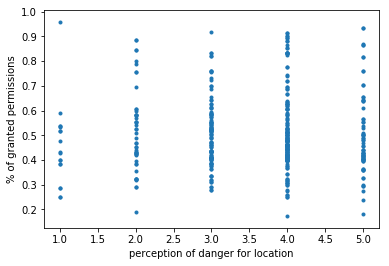

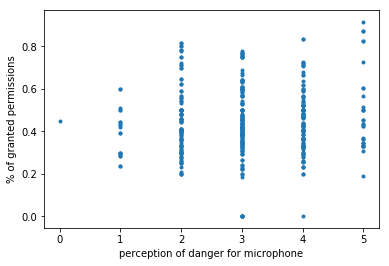

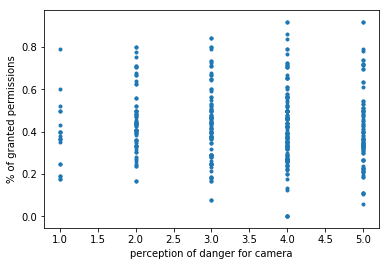

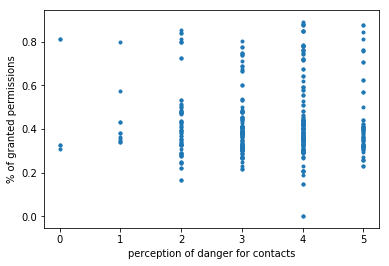

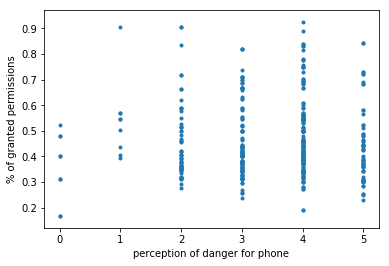

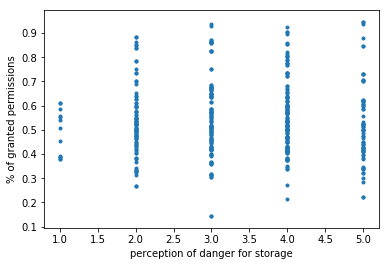

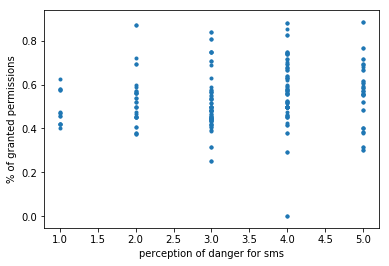

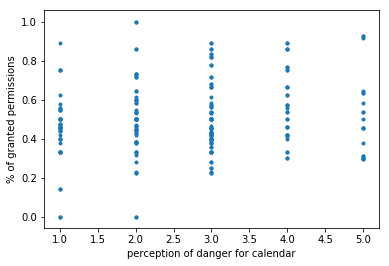

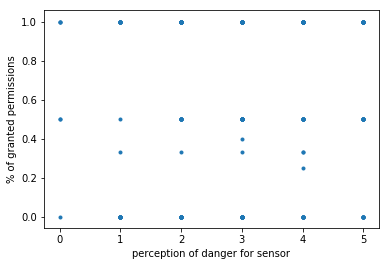

Location correlation: 
(0.028594645349663491, 0.55568180041342696)
Camera correlation: 
(-0.048483249747909497, 0.31754870805878482)
Microphone correlation: 
(0.072903974194804155, 0.13256279477920316)
Phone correlation: 
(0.03254948761849194, 0.50234282596091706)
Contacts correlation: 
(0.017458777150119262, 0.71904331447617287)
Storage correlation: 
(0.014925677859162167, 0.75843472778208043)
sms correlation: 
(0.15111285156756382, 0.020477165515603378)
sensor correlation: 
(0.039207958850164031, 0.54979206025264948)
calendar correlation: 
(0.15070423911803049, 0.020824639364751818)


In [272]:
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#help(pearsonr)


#calculate the correlation between the perception of danger and number of times the permission was granted
#data = pandas.read_csv('/Users/QN/Desktop/THIRD crowdperm/Analysis code/dangerLevel_out.csv', sep=',', na_values=".")
#data=dfDanger
#location
x=dfDanger['danger level of location']
y=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
#spearmanr(x,y)
location=pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for location')
plt.ylabel('% of granted permissions')
plt.show()


#mic
x=dfDanger['danger level of microphone']
y=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
mic=pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for microphone')
plt.ylabel('% of granted permissions')
plt.show()

#camera
x=dfDanger['danger level of camera']
y=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
camera=pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for camera')
plt.ylabel('% of granted permissions')
plt.show()

#contacts
x=dfDanger['danger level of contacts']
y=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
contacts =pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for contacts')
plt.ylabel('% of granted permissions')
plt.show()


#phone
x=dfDanger['danger level of phone']
y=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
phone =pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for phone')
plt.ylabel('% of granted permissions')
plt.show()

#storage
x=dfDanger['danger level of storage']
y=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
storage =pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for storage')
plt.ylabel('% of granted permissions')
plt.show()

#skip the rows with zero requested permissions
dfDanger=dfDanger[dfDanger['number of apps requested sensor'] > 0]
dfDanger=dfDanger[dfDanger['number of apps requested sms'] > 0]

#sms
x=dfDanger['danger level of sms']
y=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sms =pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for sms')
plt.ylabel('% of granted permissions')
plt.show()

#calendar
x=dfDanger['danger level of calendar']
y=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
calendar =pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for calendar')
plt.ylabel('% of granted permissions')
plt.show()

#sensor
x=dfDanger['danger level of sensor']
y=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']
sensor =pearsonr(x, y)

plt.scatter(x,y,marker='.')
plt.xlabel('perception of danger for sensor')
plt.ylabel('% of granted permissions')
plt.show()


print("Location correlation: ")
print(location)

print("Camera correlation: ")
print(camera)

print("Microphone correlation: ")
print(mic)

print("Phone correlation: ")
print(phone)

print("Contacts correlation: ")
print(contacts)

print("Storage correlation: ")
print(storage)

print("sms correlation: ")
print(sms)

print("sensor correlation: ")
print(sensor)

print("calendar correlation: ")
print(calendar)
#plt.plot(x,y)
#plt.show()




[3.5569620253164556, 3.5443037974683542, 3.5316455696202533, 3.1392405063291138, 2.7468354430379747, 3.2658227848101267, 3.4683544303797467, 3.4050632911392404, 2.962025316455696]


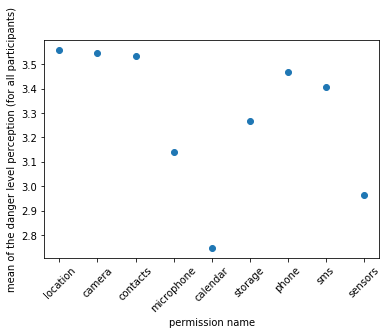

In [242]:
#plot the perception of permission danger 
permissionsMeans=[dfDanger['danger level of location'].mean(),dfDanger['danger level of camera'].mean(),dfDanger['danger level of contacts'].mean(),dfDanger['danger level of microphone'].mean(),dfDanger['danger level of calendar'].mean(),dfDanger['danger level of storage'].mean(),dfDanger['danger level of phone'].mean(),dfDanger['danger level of sms'].mean(),dfDanger['danger level of sensor'].mean()]
print(permissionsMeans)
#plt.scatter(permissionNames,permissionsMeans)
plt.plot(permissionsMeans,'o')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('mean of the danger level perception (for all participants)')
plt.show()

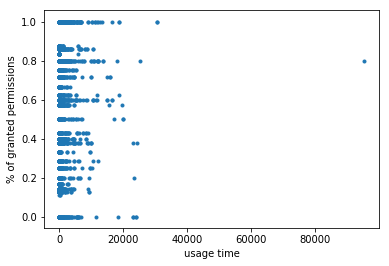

In [251]:
#test the hypothesis "Most frequently used apps are less restricted"
#In other words: the higher the usage time, the higher the number of granted permissions"
#read usage time file into a dataframe
usagedata=dfUsage

#try again with another filter
#skip the rows with zero requested permissions
usagedata=usagedata[usagedata['number of permissions requested'] > 4]
x=usagedata['usagetime']
y=usagedata['number of permissions granted']/usagedata['number of permissions requested']
#spearmanr(x,y)
pearsonr(x, y)


#plot the usagetime vs. %of granted permissions
import matplotlib.pyplot as plt
import numpy as np
#x=np.log(x)
plt.scatter(x/60,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
#plt.xscale('log')
#plt.plot(x,y)
#plt.plot(y)
plt.show()

In [229]:
pearsonr(x, y)

(0.090520127013979532, 0.0018299477892386785)

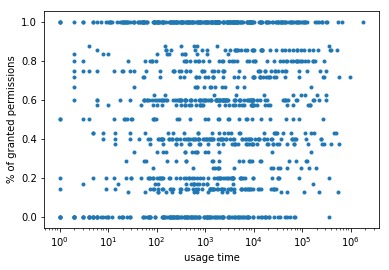

In [230]:
plt.xscale('log')
plt.scatter(x,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
plt.show()

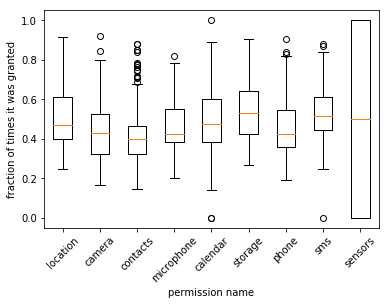

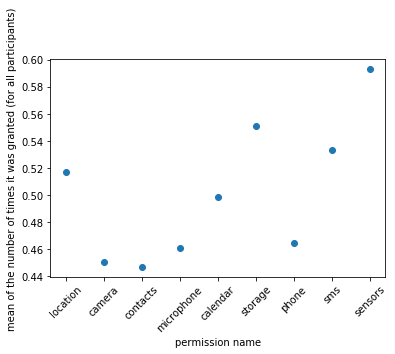

In [235]:
location=dfDanger['number of apps granted location']/dfDanger['number of apps requested location']
camera=dfDanger['number of apps granted camera']/dfDanger['number of apps requested camera']
contacts=dfDanger['number of apps granted contacts']/dfDanger['number of apps requested contacts']
microphone=dfDanger['number of apps granted microphone']/dfDanger['number of apps requested microphone']
calendar=dfDanger['number of apps granted calendar']/dfDanger['number of apps requested calendar']
storage=dfDanger['number of apps granted storage']/dfDanger['number of apps requested storage']
phone=dfDanger['number of apps granted phone']/dfDanger['number of apps requested phone']
sms=dfDanger['number of apps granted sms']/dfDanger['number of apps requested sms']
sensors=dfDanger['number of apps granted sensor']/dfDanger['number of apps requested sensor']

permissionCounts=[location,camera,contacts,microphone,calendar,storage,phone,sms,sensors]
permissionsMeans=[location.mean(),camera.mean(),contacts.mean(),microphone.mean(),calendar.mean(),storage.mean(),phone.mean(),sms.mean(),sensors.mean()]
permissionNames=['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors']

plt.figure()
plt.boxplot(permissionCounts)
plt.xticks([1, 2, 3,4,5,6,7,8,9],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('fraction of times it was granted')
plt.show()


#plt.scatter(permissionNames,permissionsMeans)
plt.plot(permissionsMeans,'o')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['location','camera','contacts','microphone','calendar','storage','phone','sms','sensors'])
plt.xticks(rotation=45)
plt.xlabel('permission name')
plt.ylabel('mean of the number of times it was granted (for all participants)')
plt.show()

In [275]:
#look at the story questions
#select * from survey2 where story !='No'
#in stories:
#compare the comfort level for re-enabling the permission vs. deleting the app 
from scipy.stats.stats import mannwhitneyu
from scipy.stats.stats import ttest_ind

#read the survey2 table into a dataframe
surveyData=pandas.read_sql_query("select * from survey2", cnx) 
#focus only on stories
stories=surveyData[surveyData['storySolve']!='NA']

#coding the comfort level questions 
storyUninstallComfort=[]
storyEnableComfort=[]
for index, row in stories.iterrows():
    #print (row['storyUninstallComfort'], row['storyEnableComfort'])
    if row['storyUninstallComfort'] == 'strongly agree':
        storyUninstallComfort.append(5)
    if row['storyUninstallComfort'] == 'agree':
        storyUninstallComfort.append(4)
    if row['storyUninstallComfort'] == 'neutral':
        storyUninstallComfort.append(3)
    if row['storyUninstallComfort'] == 'disagree':
        storyUninstallComfort.append(2)
    if row['storyUninstallComfort'] == 'strongly disagree':
        storyUninstallComfort.append(1)
        
    if row['storyEnableComfort'] == 'strongly agree':
        storyEnableComfort.append(5)
    if row['storyEnableComfort'] == 'agree':
        storyEnableComfort.append(4)
    if row['storyEnableComfort'] == 'neutral':
        storyEnableComfort.append(3)
    if row['storyEnableComfort'] == 'disagree':
        storyEnableComfort.append(2)
    if row['storyEnableComfort'] == 'strongly disagree':
        storyEnableComfort.append(1)

        
x=storyEnableComfort
y=storyUninstallComfort
#mannwhitneyu(x, y, use_continuity=True, alternative=None)
ttest_ind(x, y, axis=0, equal_var=True)

Ttest_indResult(statistic=-3.5055120733351068, pvalue=0.00077288572595573537)